# SVM image recog

In [ ]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
faces = fetch_olivetti_faces()
print(faces)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752

In [ ]:
print (faces.keys())

dict_keys(['data', 'images', 'target', 'DESCR'])


In [ ]:
print(faces.images.shape)

(400, 64, 64)


In [ ]:
print(faces.data.shape)

(400, 4096)


In [ ]:
print(faces.target.shape)

(400,)


In [ ]:
print (np.max(faces.data))

1.0


In [ ]:
print(np.min(faces.data))

0.0


In [ ]:
print(np.mean(faces.data))

0.5470426


None


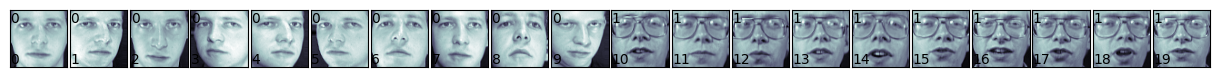

In [ ]:
def print_faces(images, target, top_n):
  fig = plt.figure(figsize=(12, 12))
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
  for i in range(top_n):
    p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
    p.imshow(images[i], cmap=plt.cm.bone)
    p.text(0, 14, str(target[i]))
    p.text(0, 60, str(i))
print (print_faces(faces.images, faces.target, 20))

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_1 = SVC(kernel='linear')

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, x, y, K):
  cv = KFold(K, shuffle=True, random_state=0)
  scores = cross_val_score(clf, x, y, cv = cv)
  print( scores )
  return ("Mean score: {0: .3f} (+/- {1:.3f})").format(np.mean(scores), sem(scores))

print(evaluate_cross_validation(svc_1, x_train, y_train, 5))

[0.93333333 0.86666667 0.91666667 0.93333333 0.91666667]
Mean score:  0.913 (+/- 0.012)


In [ ]:
from sklearn import metrics

def train_and_eval(clf, x_train, x_test, y_train, y_test):
  clf.fit(x_train, y_train)

  print("Accuracy on trainning set:")
  print(clf.score(x_train, y_train))

  print("Accuracy on testing set:")
  print(clf.score(x_test, y_test))

  y_pred = clf.predict(x_test)

  print("Classification Report")
  print(metrics.classification_report(y_test, y_pred))

  print("Confusion metrics")
  print(metrics.confusion_matrix(y_test, y_pred))


train_and_eval(svc_1, x_train, x_test, y_train, y_test)

Accuracy on trainning set:
1.0
Accuracy on testing set:
0.99
Classification Report
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

In [ ]:
glasses = [
   (10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
   (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
   (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
   (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
   (330, 339), (358, 359), (360, 369)
]

In [ ]:
def create_target(segments):
  y=np.zeros(faces.target.shape[0])
  for (start, end) in segments:
    y[start: end + 1] = 1
  return y

target_glasses = create_target(glasses)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)

In [ ]:
svc_2 = SVC(kernel="linear")

In [ ]:
evaluate_cross_validation(svc_2, x_train, y_train, 5)

[1.         0.95       0.98333333 0.98333333 0.93333333]


'Mean score:  0.970 (+/- 0.012)'

In [ ]:
train_and_eval(svc_2, x_train, x_test, y_train, y_test)

Accuracy on trainning set:
1.0
Accuracy on testing set:
0.99
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion metrics
[[66  1]
 [ 0 33]]


In [ ]:
x_test = faces.data[30:40]
y_test = target_glasses[30:40]
print (y_test.shape[0])

10


In [ ]:
select = np.ones(target_glasses.shape[0])

In [ ]:
select[30:40]= 0

In [ ]:
x_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

In [ ]:
print( y_train.shape[0])

390


In [ ]:
svc_3 = SVC(kernel='linear')
train_and_eval(svc_3, x_train, x_test, y_train, y_test)

Accuracy on trainning set:
1.0
Accuracy on testing set:
0.9
Classification Report
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion metrics
[[5 0]
 [1 4]]


In [ ]:
y_pred = svc_3.predict(x_test)
eval_faces = [np.reshape(a, (64, 64)) for a in x_test]

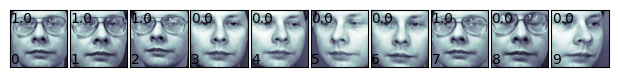

In [ ]:
print_faces(eval_faces, y_pred, 10)